In [19]:
# Q 1 : How many unique students are included in the dataset?

import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your dataset's path)
df = pd.read_excel('Data analyst Data.xlsx')

# Create a unique identifier for each student using a combination of relevant attributes
df['StudentID'] = df['First Name'] + df['Email ID'] + df['Events'] + df['College Name'] + df['Designation'] + df['Year of Graduation'].astype(str) + df['City'] + df['CGPA'].astype(str) + df['Experience with python (Months)'].astype(str) + df['Expected salary (Lac)'].astype(str) + df['Family Income'].astype(str)

# Count the number of unique students based on the StudentID
unique_students_count = df['StudentID'].nunique()

print(f'The number of unique students in the dataset is: {unique_students_count}')


The number of unique students in the dataset is: 4879


In [20]:
# Q 2 : What is the average GPA of the students?

import pandas as pd

# Load the dataset (replace 'your_dataset.xlsx' with your dataset's path)
df = pd.read_excel('Data analyst Data.xlsx')

# Calculate the average CGPA
average_cgpa = df['CGPA'].mean()

print(f'The average CGPA of students is: {average_cgpa:.2f}')


The average CGPA of students is: 8.04


In [21]:
# Q 3 : What is the distribution of students across different graduation years?

import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'df'
# You may need to adjust the column names according to your dataset
# Count the distribution of students across different graduation years
graduation_year_distribution = df['Year of Graduation'].value_counts()

# Print the distribution
print(graduation_year_distribution)


2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


In [22]:
# Q 4 : What is the distribution of students experience with python programming?

import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'df'
# You may need to adjust the column names according to your dataset
# Count the distribution of students' experience with Python programming
experience_distribution = df['Experience with python (Months)'].value_counts()

# Print the distribution
print(experience_distribution)


5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


In [23]:
# Q 6 : How does the GPA vary among different colleges?

import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'df'
# You may need to adjust the column names according to your dataset

# Group the data by 'College name' and calculate the average CGPA for each college
college_cgpa_avg = df.groupby('College Name')['CGPA'].mean()

# Sort the results in descending order and display the top 5 colleges
top_5_colleges_cgpa = college_cgpa_avg.sort_values(ascending=False).head(5)

# Print the top 5 colleges and their average CGPA
print(top_5_colleges_cgpa)


College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


       Quantity
count    4894.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0


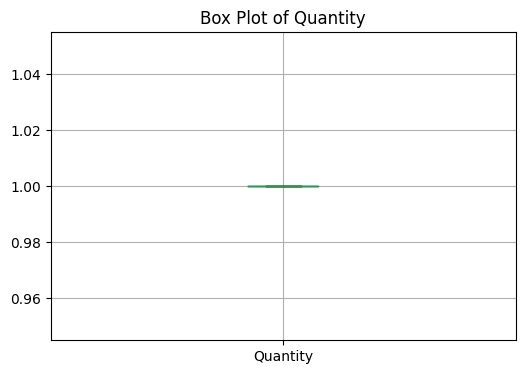

Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


In [24]:
# Q 7 : Are there any outliers in the attending status and quantity attribute?

import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_excel('Data analyst Data.xlsx')

# Summary statistics for 'Attendee status' and 'Quantity'
summary_stats = df[['Attendee Status', 'Quantity']].describe()
print(summary_stats)

import matplotlib.pyplot as plt

# Box plot for 'Quantity'
plt.figure(figsize=(6, 4))
df.boxplot(column='Quantity')
plt.title('Box Plot of Quantity')
plt.show()

from scipy import stats

# Calculate the Z-scores for 'Quantity'
z_scores = stats.zscore(df['Quantity'])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find the outliers
outliers_quantity = df[(z_scores > threshold) | (z_scores < -threshold)]

# Print the outliers for 'Quantity'
print(outliers_quantity)




In [25]:
# Q 8 : What is the average GPA for student from each city?

import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'df'
# You may need to adjust the column names according to your dataset

# Group the data by 'City' and calculate the average CGPA for each city
city_avg_cgpa = df.groupby('City')['CGPA'].mean()

# Print the average CGPA for each city
print(city_avg_cgpa)


City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


In [26]:
# Q 9 : Can we identify any relationship between family income and GPA?

import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_excel('Data analyst Data.xlsx')

# Remove non-numeric characters and convert 'Family Income' to a float
df['Family Income'] = df['Family Income'].str.replace(r'[^0-9.]', '', regex=True)
df['Family Income'] = df['Family Income'].astype(float)

# Calculate the correlation between 'Family Income' and 'CGPA'
correlation = df['Family Income'].corr(df['CGPA'])

print(f'Correlation between Family Income and CGPA: {correlation:.2f}')


Correlation between Family Income and CGPA: 0.01


In [ ]:
MODERATE QUESTIONS

In [27]:
# Q 10 : How does the expected salary vary based on factors like GPA, Family income, experience with python?

import pandas as pd
import statsmodels.api as sm

df['CGPA'] = df['CGPA'].astype(float)
df['Family Income'] = df['Family Income'].astype(float)

X = df[['CGPA', 'Family Income', 'Experience with python (Months)']]
X = sm.add_constant(X)  # Add a constant (intercept) term
y = df['Expected salary (Lac)']

model = sm.OLS(y, X).fit()

print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Expected salary (Lac)   R-squared:                       0.048
Model:                               OLS   Adj. R-squared:                  0.047
Method:                    Least Squares   F-statistic:                     81.80
Date:                   Sat, 30 Sep 2023   Prob (F-statistic):           1.25e-51
Time:                           09:25:28   Log-Likelihood:                -15948.
No. Observations:                   4894   AIC:                         3.190e+04
Df Residuals:                       4890   BIC:                         3.193e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

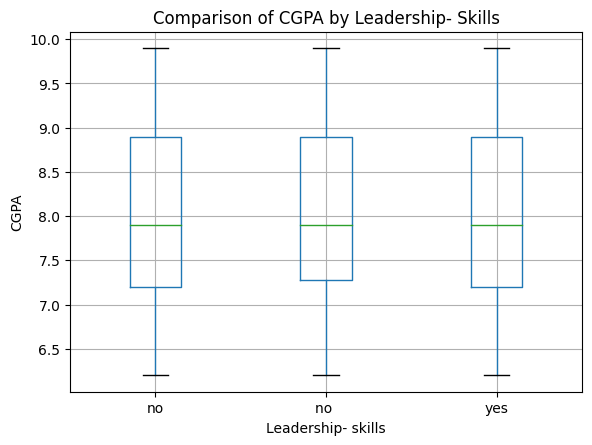

In [28]:
# Q 12 : Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

import pandas as pd

# Group by leadership status and calculate mean CGPA and expected salary
leadership_summary = df.groupby('Leadership- skills')[['CGPA', 'Expected salary (Lac)']].mean()

from scipy import stats

# Perform t-test to compare CGPA between groups
cgpa_leadership = df[df['Leadership- skills'] == 'Yes']['CGPA']
cgpa_no_leadership = df[df['Leadership- skills'] == 'No']['CGPA']

t_statistic, p_value = stats.ttest_ind(cgpa_leadership, cgpa_no_leadership)

import matplotlib.pyplot as plt

# Create box plots to compare CGPA between groups
plt.figure(figsize=(8, 6))
df.boxplot(column='CGPA', by='Leadership- skills')
plt.title('Comparison of CGPA by Leadership- Skills')
plt.suptitle('')
plt.ylabel('CGPA')
plt.show()



In [29]:
# Q 14 : How many students are graduating by the end of 2024?

import pandas as pd


# Filter students whose graduation year is on or before 2024
graduating_students = df[df['Year of Graduation'] <= 2024]

# Count the number of graduating students
num_graduating_students = len(graduating_students)

print(f'The number of students graduating by the end of 2024 is: {num_graduating_students}')


The number of students graduating by the end of 2024 is: 3047


In [30]:
# Q 15 : Which promotion channel brings in more student participations for the event?

import pandas as pd

source_counts = df['How did you come to know about this event?'].value_counts()

most_common_source = source_counts.idxmax()

print(f'The most common source for learning about the event is: {most_common_source}')


The most common source for learning about the event is: Whatsapp


In [31]:
# Q 16 : Find the total number of students who attended the events related to Data Science?

import pandas as pd

# Define a list of data science-related event names
data_science_events = ['IS DATA SCIENCE FOR YOU?']

# Filter the DataFrame to include only data science-related events
data_science_attendees = df[df['Events'].isin(data_science_events)]

# Calculate the total number of unique students who attended data science-related events
total_students_attended = data_science_attendees['Email ID'].nunique()

print(f'Total number of students who attended data science-related events: {total_students_attended}')


Total number of students who attended data science-related events: 218


In [32]:
# Q 17 : Those who have high CGPA and more experience in language those who had high expectations for salary?

import pandas as pd

# Define the criteria for filtering
high_cgpa_threshold = 3.5  # You can adjust this threshold as needed
high_python_experience_months = 12  # You can adjust this threshold as needed
above_average_salary_threshold = df['Expected salary (Lac)'].mean()  # Calculate the average salary

# Filter the DataFrame based on the criteria
filtered_students = df[
    (df['CGPA'] >= high_cgpa_threshold) &
    (df['Experience with python (Months)'] >= high_python_experience_months) &
    (df['Expected salary (Lac)'] > above_average_salary_threshold)
]

# Display the filtered DataFrame
print(filtered_students)


Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


In [33]:
# Q 18 : How many students know about the event from their colleges? Which of these top 5 colleges?

import pandas as pd

# Group the data by 'College name' and count the number of unique students for each college
college_counts = df.groupby('College Name')['Email ID'].nunique().reset_index()

# Sort the colleges by the number of students who know about the event (in descending order)
top_colleges = college_counts.sort_values(by='Email ID', ascending=False).head(5)

# Display the top 5 colleges
print("Top 5 Colleges with the Most Students Who Know About the Event:")
print(top_colleges)


Top 5 Colleges with the Most Students Who Know About the Event:
                                         College Name  Email ID
45      priyadarshini college of engineering, nagpur        234
52        vidyalankar institute of technology, mumbai       224
39     ld college of engineering, ahmedabad, gujarat        224
30  b. k. birla college of arts, science & commerc...       191
36                 government polytechnic gandhinagar       188


In [34]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'df'
# You may need to adjust the column names according to your dataset

# Group the data by the "How did you come to know about this event?" and "Events" columns
event_counts = df.groupby(['How did you come to know about this event?', 'Events']).size().reset_index(name='Count')

# Find the event with the highest count for each method of knowing about the event
top_events = event_counts.groupby('How did you come to know about this event?')['Events', 'Count'].apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

# Display the events that tend to attract more students for each method of knowing about the event
print(top_events)


                              Events  Count
0        Product Design & Full Stack     40
1        Product Design & Full Stack      2
2                  Product Marketing      1
3                    Hello ML and DL      2
4        Product Design & Full Stack      6
..                               ...    ...
94            Art of Resume Building      4
95  The SDLC & their transformations      1
96                   Hello ML and DL      4
97            Art of Resume Building      1
98       Product Design & Full Stack      1

[99 rows x 2 columns]


<ipython-input-34-d703df8073d9>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_events = event_counts.groupby('How did you come to know about this event?')['Events', 'Count'].apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
